# Clustering Techniques


# K - Means Clustering Techniques

### Importing Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_diabetes
from pandas import DataFrame
from sklearn.preprocessing import LabelEncoder

In [48]:
df = pd.read_csv('Mall_Customers_K_means.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Encoding string values

In [50]:
# Encoding 'Gender' string values
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### Plotting

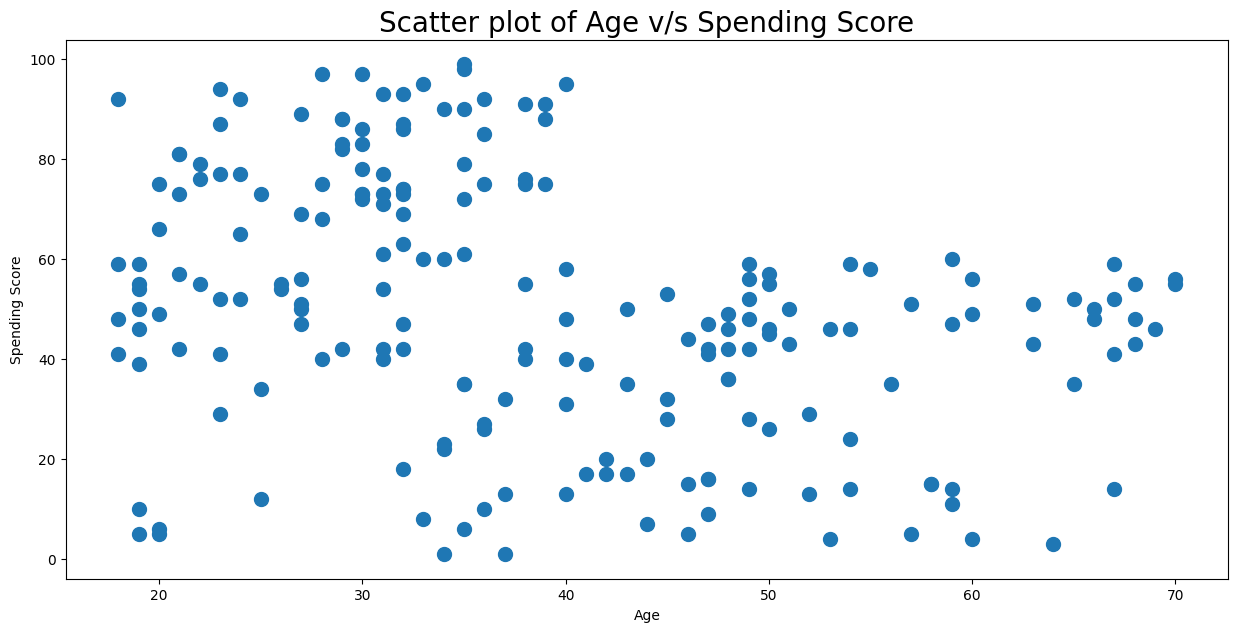

In [63]:
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Age v/s Spending Score', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, s = 100)
plt.show()

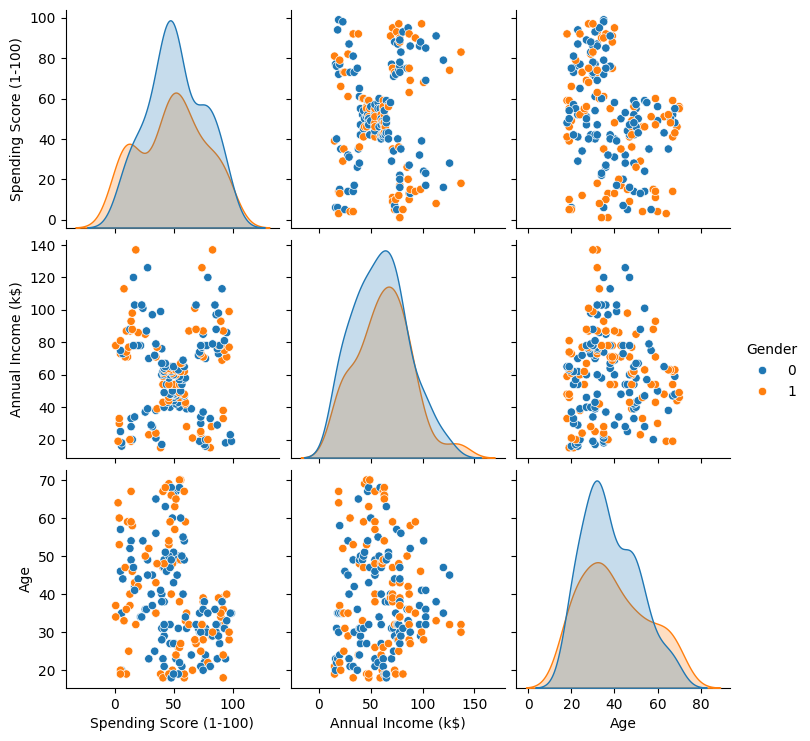

In [62]:
sns.pairplot(df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue = "Gender")

### Deciding the number of clusters

In [70]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='lloyd') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

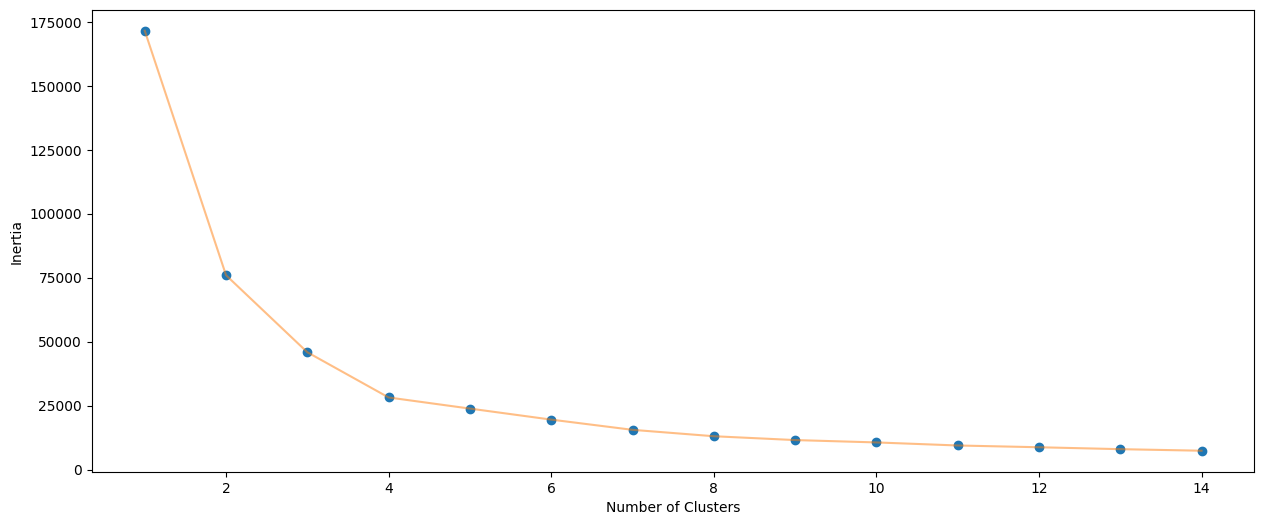

In [71]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

### Apply Kmeans for k=4

In [95]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, algorithm='elkan') )

In [89]:
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

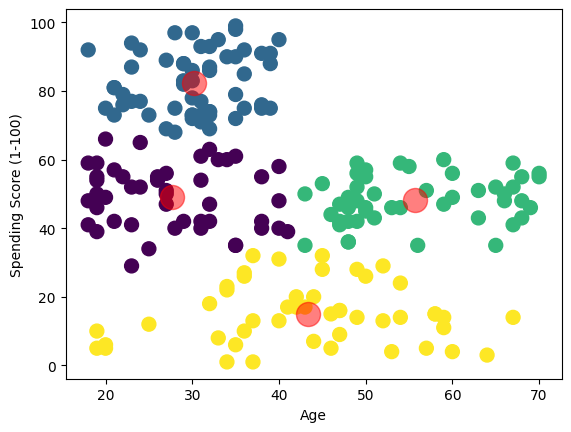

In [94]:
plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()


### Prediction of a random data

In [93]:
algorithm.predict([[30, 100],[60, 130]])

array([1, 1], dtype=int32)

# Gaussian Mixture Models Clustering

### Importing Libraries

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from pandas import DataFrame
from sklearn.preprocessing import LabelEncoder

### Loading iris dataset

In [ ]:
iris = load_iris()
iris

### Selecting first two column and turn to dataframe

In [106]:
X = iris.data[:, :2]
# y = iris.target This line assigns the target variable of the iris dataset to the variable y. In the iris dataset, the target variable represents the species of iris flower (setosa, versicolor, or virginica)
df = pd.DataFrame(X, columns=['Sepal Length', 'Sepal Width'])
df.head()

,0,1
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


### Fit the data as 3 Gaussian mixture

In [137]:
gmm = GaussianMixture(n_components=3)
gmm.fit(df)

GaussianMixture(n_components=3)

### Check if the model has converged

In [113]:
print('Converged::', gmm.converged_)

Converged:: True


### Print the no.of iteration needed

In [114]:
print(gmm.n_iter_)

8


### Get final means of each cluster

In [115]:
gmm.means_

array([[5.9009976 , 2.74387546],
       [6.68055626, 3.02849627],
       [5.01507898, 3.4514463 ]])

### Predict the cluster


In [ ]:
df.columns = df.columns.astype(str)
label = gmm.predict(df[['0', '1']])

### Plot data records

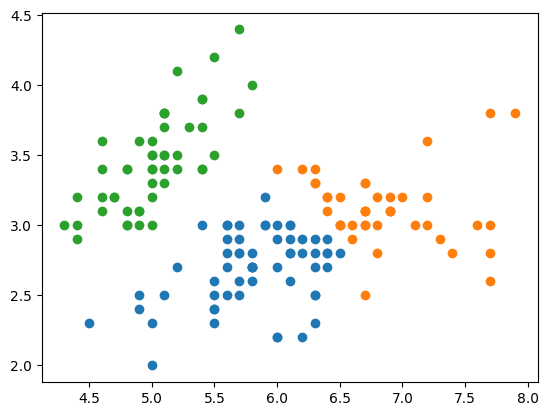

In [134]:
df_cluster0 = df[df['labels'] == 0]
df_cluster1 = df[df['labels'] == 1]
df_cluster2 = df[df['labels'] == 2]
plt.scatter(df_cluster0['0'], df_cluster0['1'])
plt.scatter(df_cluster1['0'], df_cluster1['1'])
plt.scatter(df_cluster2['0'], df_cluster2['1'])
plt.show()

# Hierarchial Clustering

### Importing Libraries

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from pandas import DataFrame
from sklearn.preprocessing import normalize

### Loading dataset

In [139]:
df = pd.read_csv('Wholesale customers data.csv')
df.head()
#

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Normalize the dataset to get all features at same scale

In [146]:
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


### Draw Dendogram to find optimum number of clusters

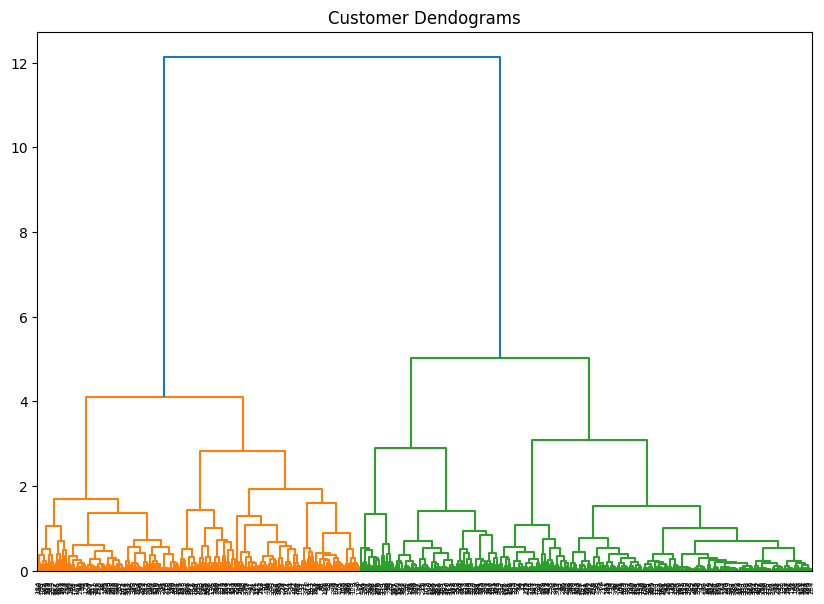

In [147]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.show()

### Applying AgglomerativeClustering

In [158]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2)
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

### Visualize Cluster

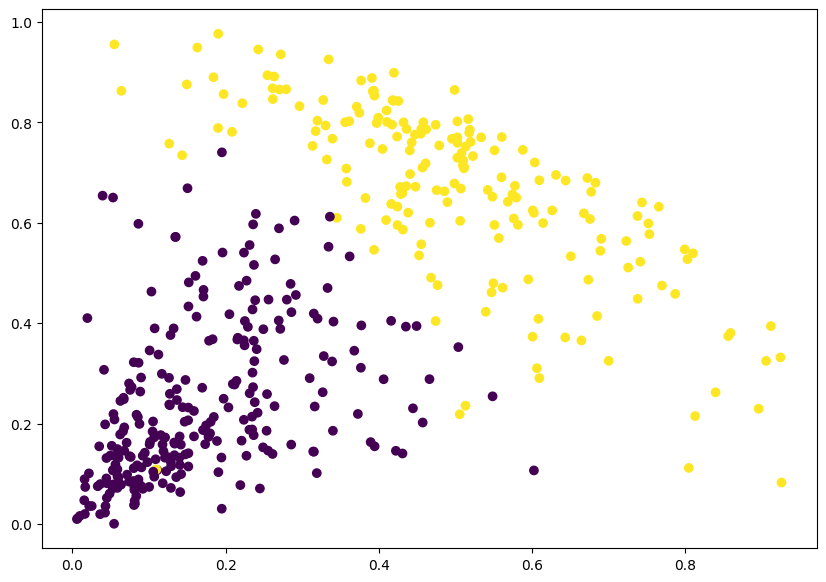

In [156]:
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_)
plt.show()
#

# Density Based DBSCAN Clustering

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
from pylab import *

### Data Generation

In [161]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

### Visualize Data

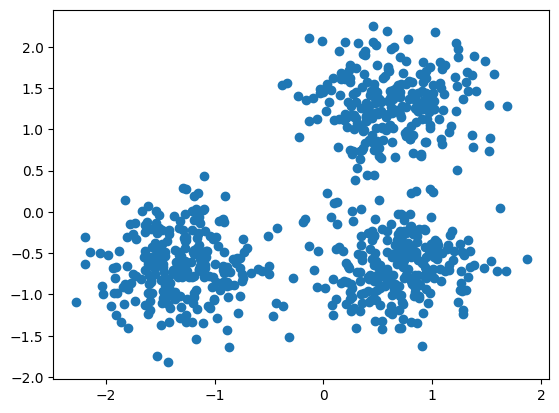

In [162]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

### Compute DBSCAN

In [163]:
from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


### Print Metrics

In [164]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")
# Homogeneity: Measures whether each cluster contains only members of a single class. A score of 1.0 is perfect.
# Completeness: Measures whether all members of a given class are assigned to the same cluster. A score of 1.0 is perfect.
# V-measure: The harmonic mean of homogeneity and completeness. A score of 1.0 is perfect.
# Adjusted Rand Index: Measures the similarity between the true and predicted cluster assignments, adjusted for chance. A score of 1.0 is perfect.
# Adjusted Mutual Information: Measures the mutual information between the true and predicted cluster assignments, adjusted for chance. A score of 1.0 is perfect.
# Silhouette Coefficient: Measures how similar an object is to its own cluster compared to other clusters. A score closer to 1 indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters. A score near 0 indicates that the data point is on the boundary between two clusters, and negative values indicate that the data point might have been assigned to the wrong cluster.

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


### Plot results

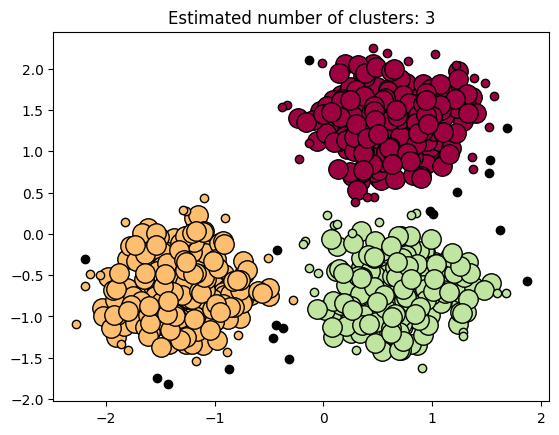

In [165]:
# This creates a boolean mask that is True for data points belonging to the current cluster k and False otherwise.
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k
    # xy = X[class_member_mask & core_samples_mask]: This selects the data points from the original data X that belong to the current cluster (class_member_mask) AND are also identified as core samples by DBSCAN (core_samples_mask). Core samples are the central points of a cluster.
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )
    # xy = X[class_member_mask & ~core_samples_mask]: This selects the data points from X that belong to the current cluster (class_member_mask) BUT are NOT core samples (~core_samples_mask). These are the border points of the cluster.
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()